# BREAST CANCER

Dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the images.

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The dataset contains features derived from these measurements. For each feature, the mean value across all cells, the standard error (standard deviation), and the worst case were computed and reported in the data.

The target feature is diagnosis (0 = malignant, 1 = benign)

## Importing the packages & data

In [ ]:
#!pip install numpy pandas matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('../data/raw/breast_cancer.csv')

## Data Cleaning

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ', '_', regex=True)

In [ ]:
## Changing the diagnosis variable so that 1 = Malignant
df['diagnosis'] = df['diagnosis'].map({0: 1, 1: 0})

## Initial Analysis

#### Dimensions

In [ ]:
print(f"We have {df.shape[0]} records, and {df.shape[1]} columns.")

We have 569 records, and 31 columns.


#### Describing the data

In [ ]:
df.diagnosis.unique()

array([1, 0])

In [ ]:
summary = df.describe().T
summary['cv'] = summary['std'] / summary['mean'] # Coefficient of Variation
summary

,count,mean,std,min,25%,50%,75%,max,cv
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.249450
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0.222971
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0.264208
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,0.537364
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.145954
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.506155
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.897753
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.793204
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.151325
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.112430


We can see that all of the fields are numeric, and do not contain missing data (each has a count of 569)

#### Outliers

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
outlier_counts = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()
print("\nNumber of Outliers per Feature:\n", outlier_counts)


Number of Outliers per Feature:
 mean_radius                14
mean_texture                7
mean_perimeter             13
mean_area                  25
mean_smoothness             6
mean_compactness           16
mean_concavity             18
mean_concave_points        10
mean_symmetry              15
mean_fractal_dimension     15
radius_error               38
texture_error              20
perimeter_error            38
area_error                 65
smoothness_error           30
compactness_error          28
concavity_error            22
concave_points_error       19
symmetry_error             27
fractal_dimension_error    28
worst_radius               17
worst_texture               5
worst_perimeter            15
worst_area                 35
worst_smoothness            7
worst_compactness          16
worst_concavity            12
worst_concave_points        0
worst_symmetry             23
worst_fractal_dimension    24
diagnosis                   0
dtype: int64


#### Distribution per feature

In [ ]:
df_viz = df.copy()

In [ ]:
df_viz['diagnosis'] = df_viz['diagnosis'].map({1: 'malignant', 0: 'benign'}).astype('category')

And check the distribution of our target variable:

In [ ]:
df_viz['diagnosis'].value_counts()

,count
diagnosis,
benign,357
malignant,212


In [ ]:
# We define the colors to be used during the analysis for malignant / benign
counts = df_viz['diagnosis'].value_counts()
color_map = {
    'benign': 'lightblue',
    'malignant': 'plum'
}

colors = [color_map[cat] for cat in counts.index]

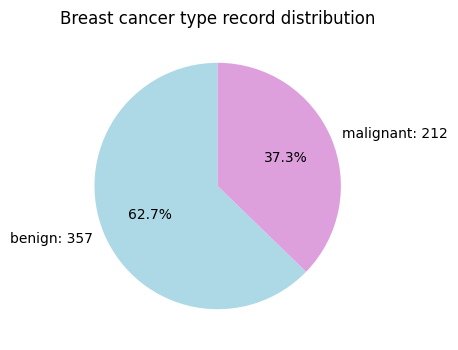

In [ ]:
counts = df_viz['diagnosis'].value_counts()
labels = [f"{cat}: {count}" for cat, count in zip(counts.index, counts.values)]

plt.figure(figsize=(4,4))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Breast cancer type record distribution')
plt.show()

We can have a quick look at the variables values distribution based on the breast cancer type:

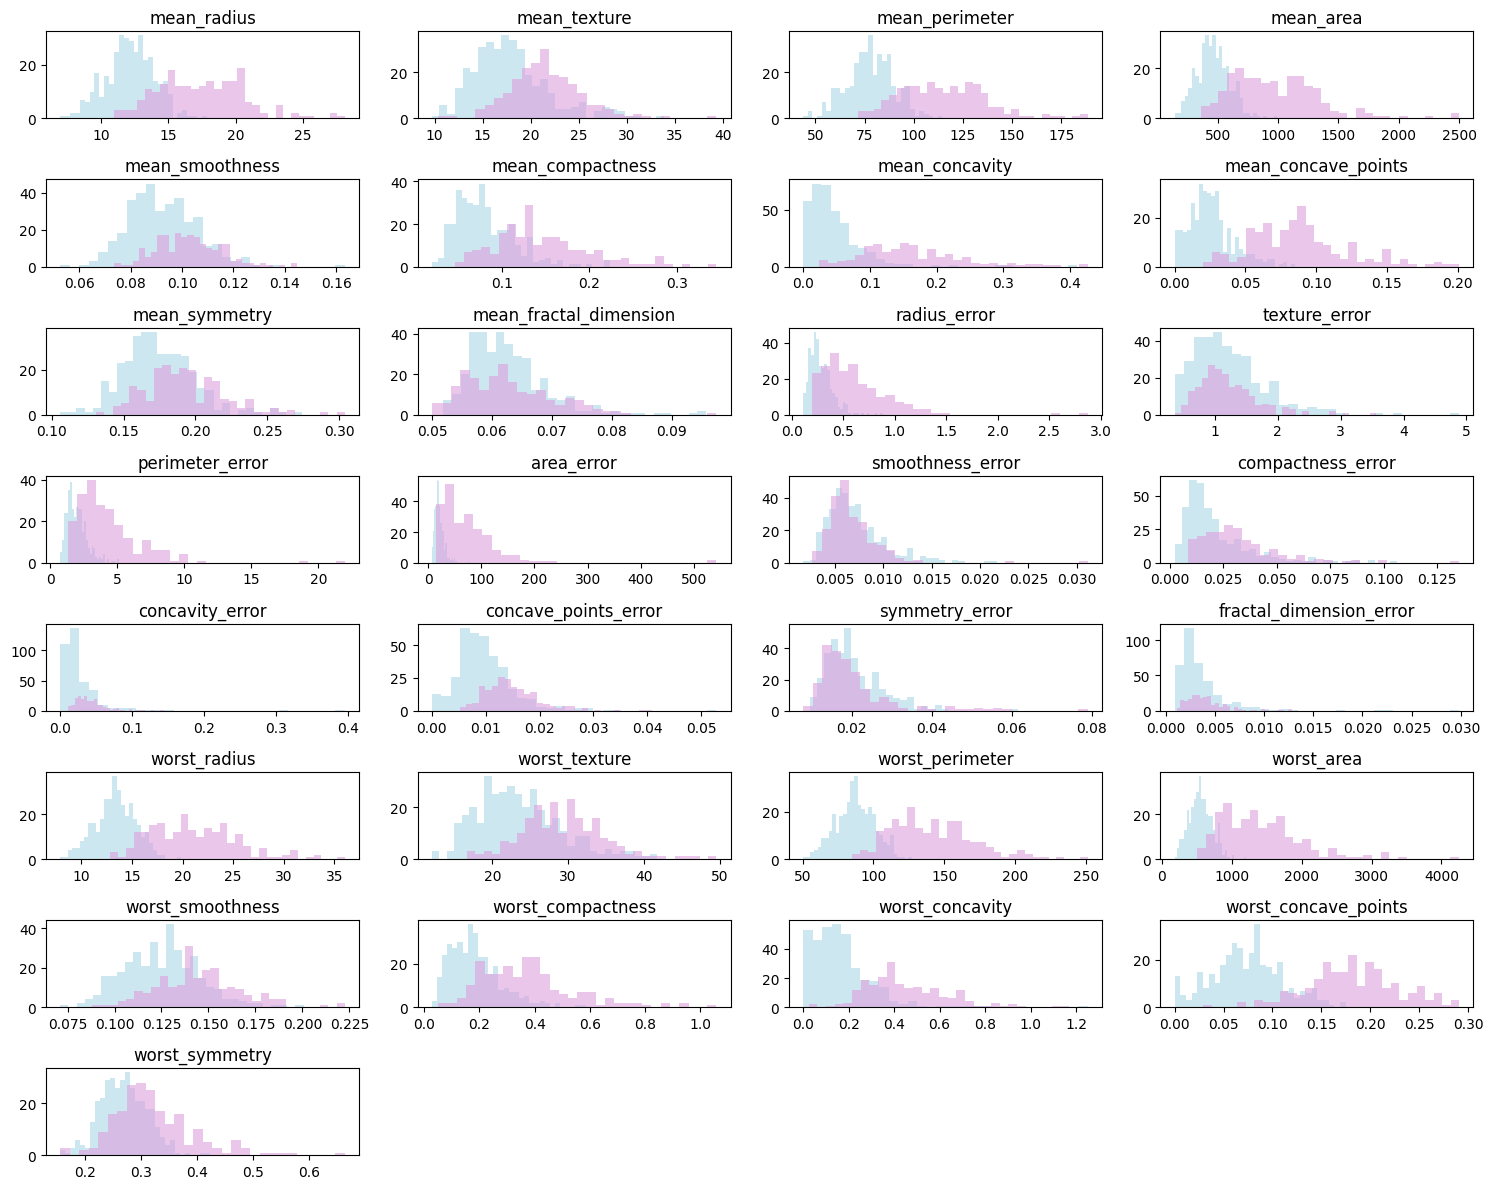

In [ ]:
num_cols = df.columns[:-2]

n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

df_benign = df[df['diagnosis'] == 0]
df_malignant = df[df['diagnosis'] == 1]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.hist(
        df_benign[col],
        bins=30,
        alpha=0.6,
        color=color_map['benign'],
        label='Benign'
    )
    ax.hist(
        df_malignant[col],
        bins=30,
        alpha=0.6,
        color=color_map['malignant'],
        label='Malignant'
    )
    ax.set_title(col)

# Remove empty subplots
for ax in axes[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

#### Aggregating by Diagnosis

(1 = malignant, 0 = benign)

In [ ]:
# Mean values per diagnosis group
df.groupby('diagnosis').mean().head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


#### Feature Correlation

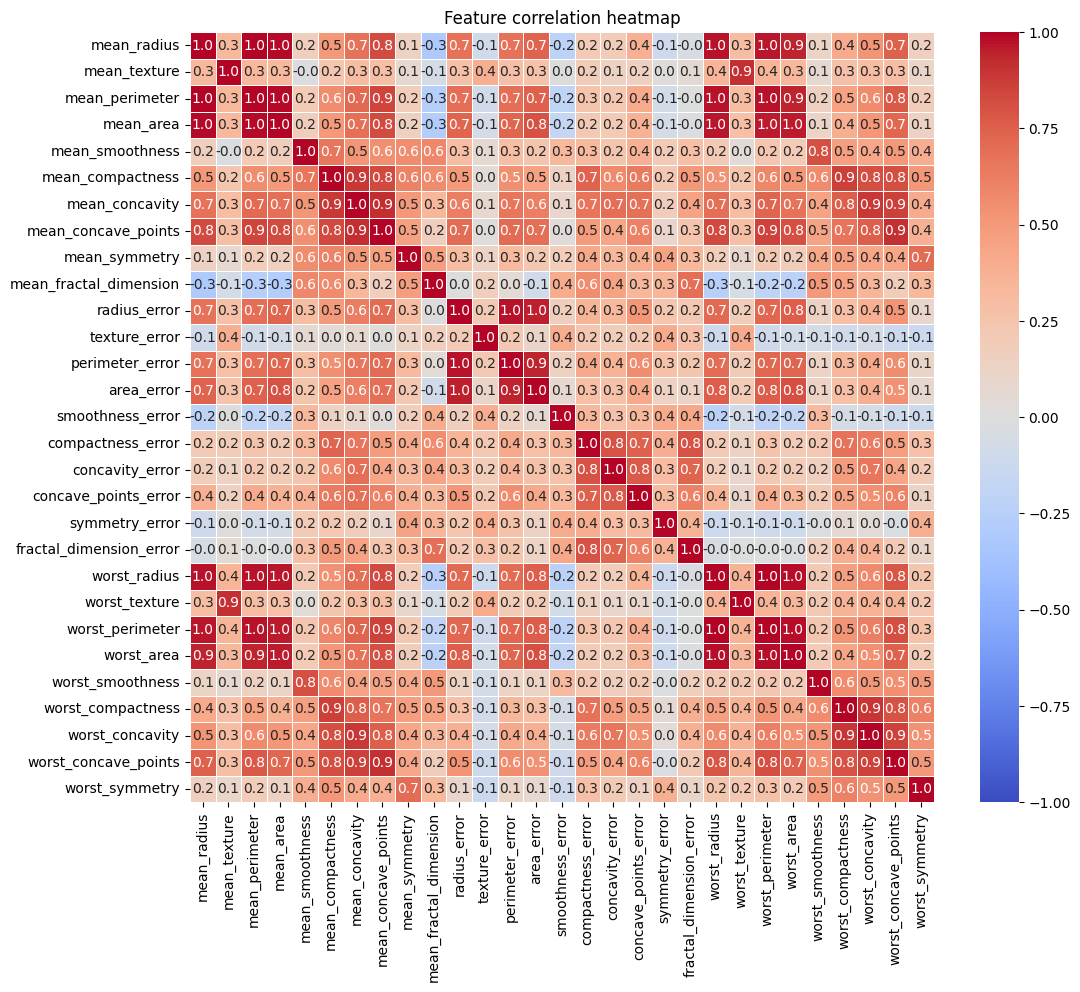

In [ ]:
corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            annot=True,
            fmt=".1f", # Round to 2 decimal places
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5)
plt.title('Feature correlation heatmap')
plt.show()

Feature correlation just with the diagnosis

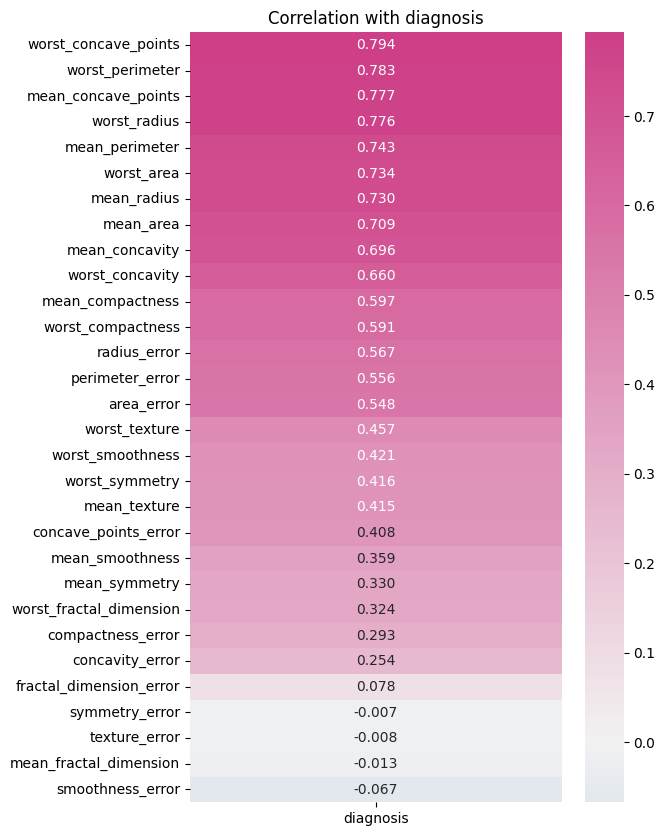

In [ ]:
corr_with_target = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_with_target.to_frame(),
    cmap=sns.diverging_palette(250, 345, as_cmap=True),
    center=0,
    annot=True,
    fmt=".3f"
)
plt.title('Correlation with diagnosis')
plt.show()

#### Separability

worst_concave_points is most correlated to diagnosis - choose this feature vs mean_radius to understand the separability

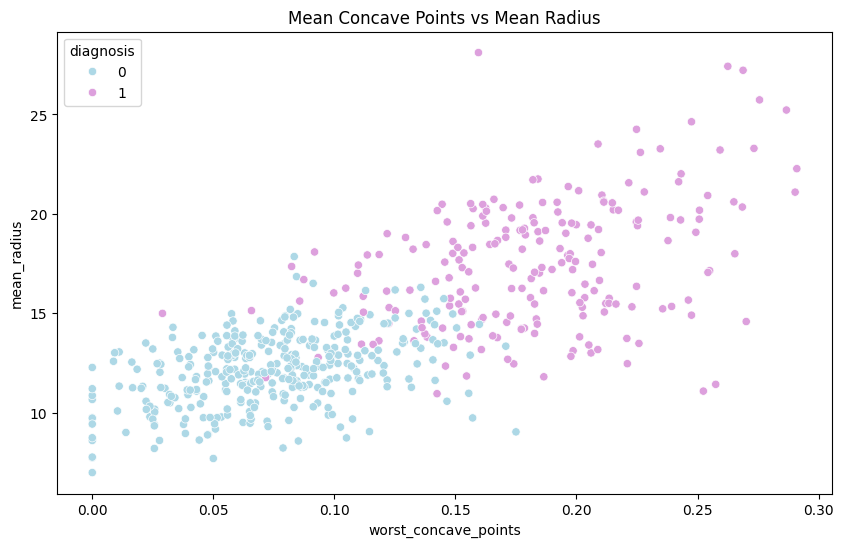

In [ ]:
# Scatterplot showing class separability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='worst_concave_points', y='mean_radius', hue='diagnosis', palette={0: 'lightblue', 1: 'plum'})
plt.title('Mean Concave Points vs Mean Radius')
plt.show()

In [ ]:
# Add subject_id for identification
df['subject_id'] = range(1, len(df) + 1)

## Summary of initial analysis/feature correlation

**Statistics Table**
- Error and concavity features have the  highest variability (shown by the coefficient of variation)
- This means that scaling is required
- Mean smoothness is relatively stable across samples
- The dataset shows 37% / 63% split between benign and malignant cases, which biases the values of the statistics table toward Benign characteristics

**Distribution plots / Outliers**
- Histograms show malignant distributions are shifted to the right for the size features, indicating malignant cells are generally larger
- Features like mean_smoothness show a high degree of overlap between diagnosis outcomes, making them less reliable predictors
- Benign tend to be more tightly clustered (normal), while Malignant distributions have longer tails (extreme values)
- Using the 1.5x IQR method, we see that area features contain the most outliers
- The presence of the extreme outliers proves that Min-Max Scaling is safer than Z-score scaling to keep the feature range bounded between 0 and 1
- Keep outliers because these show extreme values and are an indication of malignant cells

**Correlation Matrix** \
*Redundant features:*
- mean_radius, mean_perimeter, and mean_area are very highly correlated (they are also mathematically redundant - keep mean_radius)
- worst_radius is highly correlated to mean_radius
- worst_texture is highly correlated to mean_texture
- mean_concave_points is highly correlated to mean_concavity and worst_concave_points (worst is more predictive)
- The correlation between texture_error/symmetry_error/smoothness_error/fractal_dimension_error and the diagnosis is almost zero, indicating it doesnt help in predicting cancer

*Powerful features:*
- worst_concave_points shows the highest correlation with the diagnosis, making it the most powerful feature for the model
- "Worst" features (the mean of the largest cells) generally show higher correlations with the diagnosis than "Mean" features, showing it is important to look at extreme cell growth
- mean_fractal_dimension and smoothness_error show very low correlation with size, so they could provide unique information that radius cant

In [ ]:
cols_to_drop = [
    'mean_perimeter', 'mean_area', 'perimeter_error', 'area_error', 'worst_perimeter', 'worst_area',
    'worst_radius', 'worst_texture',
    'mean_concave_points',
    'texture_error', 'smoothness_error', 'symmetry_error', 'fractal_dimension_error'
]

df_filtered = df.drop(columns=cols_to_drop)

## Normalise Features

In [ ]:
scaler = MinMaxScaler()
features_to_scale = df_filtered.drop(columns=['diagnosis', 'subject_id'])
scaled_array = scaler.fit_transform(features_to_scale)

In [ ]:
df_normalised = pd.DataFrame(scaled_array, columns=features_to_scale.columns)

In [ ]:
# Re add target variable into the normalised df
df_normalised['subject_id'] = df_filtered['subject_id'].values
df_normalised['diagnosis'] = df_filtered['diagnosis'].values

In [ ]:
df_normalised.head()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,radius_error,compactness_error,concavity_error,concave_points_error,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,subject_id,diagnosis
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,0.605518,0.356147,0.351398,0.135682,0.300625,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1,1
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,0.141323,0.156437,0.081323,0.046970,0.253836,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,2,1
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,0.211247,0.229622,0.283955,0.096768,0.389847,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,3,1
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1.000000,0.139091,0.543215,0.142955,0.353665,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,4,1
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,0.186816,0.233822,0.167918,0.143636,0.357075,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,5,1


## KNN classification model

We start with splitting the data into labels (y) and observations (X), and into training and validation (test).

In [ ]:
y = df_normalised['diagnosis']
X = df_normalised.drop(['diagnosis','subject_id'], axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

As we already know that the number of neighbours affects the performance of the model. We will use the elbow method (as seen in class), a visual heuristic used to determine the best number of parameters, as k in KNN.
We plot model performance on the training set against increasing values of k, and the point where improvements begin to diminish is chosen as the best balance between performance and complexity.

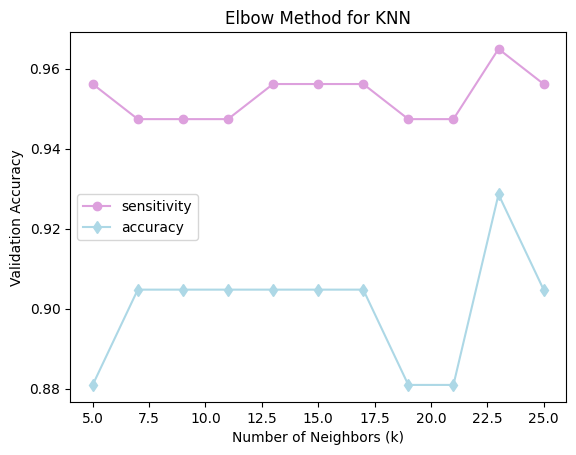

In [ ]:
k_values = range(5, 27,2) # Range of k values (number of neighbours) to test
acc = []
sens = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc.append(knn.score(X_val, y_val))
    sens.append(recall_score(y_val, y_pred))


# Plot elbow curve
plt.plot(k_values, acc, marker='o', color='plum')
plt.plot(k_values, sens, marker='d',color='lightblue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Elbow Method for KNN')
plt.legend(['sensitivity','accuracy'])
plt.show()

In [ ]:
best_k = k_values[np.argmax(sens)] #observe we are taking the decision based on the sensitivity because the dataset is unbalanced!!!
print("Best k:", best_k)

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = knn_final.predict(X_val)
val_accuracy = knn.score(X_val, y_val)
# Metrics

cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()
precision = precision_score(y_val, y_val_pred)
sensitivity = recall_score(y_val, y_val_pred)   # also called recall or True Positive Rate
specificity = tn / (tn + fp)
f_score = f1_score(y_val, y_val_pred)

print("Confusion Matrix:\n", cm)

print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F-score:", f_score)

print("Validation accuracy with best k:", val_accuracy)

Best k: 23
Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.975
Sensitivity (Recall): 0.9285714285714286
Specificity: 0.9861111111111112
F-score: 0.9512195121951219
Validation accuracy with best k: 0.956140350877193


In [ ]:
# import numpy as np
# import pandas as pd
# import os

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

# # ---- Path corrected for your machine ----
# DATA_PATH = r"C:\Users\Admin\Desktop\wdbc.data"

# feature_names = [
#     "mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness",
#     "mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension",
#     "radius_error","texture_error","perimeter_error","area_error","smoothness_error",
#     "compactness_error","concavity_error","concave_points_error","symmetry_error","fractal_dimension_error",
#     "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness",
#     "worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"
# ]
# columns = ["subject_id", "diagnosis"] + feature_names

# # Safety check
# if not os.path.exists(DATA_PATH):
#     raise FileNotFoundError(f"Not found: {DATA_PATH}")

# df = pd.read_csv(DATA_PATH, header=None, names=columns)

# print("Dataset shape:", df.shape)
# df.head()
# # ======================================================
# # 2) Remap diagnosis (B=0 benign, M=1 malignant)
# # ======================================================
# df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})

# print("Diagnosis distribution (0=benign, 1=malignant):")
# print(df["diagnosis"].value_counts())


# # ======================================================
# # 3) Prepare X and y
# # ======================================================
# X = df.drop(columns=["subject_id", "diagnosis"])
# y = df["diagnosis"]


# # ======================================================
# # 4) Feature selection (aligned with report)
# #    - Drop highly correlated features (abs corr > 0.90)
# #    - Drop weak predictors vs diagnosis (abs corr < 0.05)
# # ======================================================
# corr_matrix = X.corr().abs()
# upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# high_corr_features = [
#     col for col in upper_triangle.columns
#     if any(upper_triangle[col] > 0.90)
# ]

# corr_with_target = X.join(y).corr(numeric_only=True)["diagnosis"].drop("diagnosis").abs()
# low_corr_features = corr_with_target[corr_with_target < 0.05].index.tolist()

# features_to_drop = sorted(set(high_corr_features + low_corr_features))

# print("\n--- Feature Selection ---")
# print(f"Highly correlated features dropped (>0.90): {len(high_corr_features)}")
# print(high_corr_features)
# print(f"\nLow-correlation features dropped (<0.05): {len(low_corr_features)}")
# print(low_corr_features)
# print(f"\nTotal dropped: {len(features_to_drop)}")

# X_selected = X.drop(columns=features_to_drop)
# print("Remaining features:", X_selected.shape[1])


# # ======================================================
# # 5) Normalisation (MinMaxScaler)
# # ======================================================
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X_selected)


# # ======================================================
# # 6) Train / Test split
# # ======================================================
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled,
#     y,
#     test_size=0.2,
#     random_state=42,
#     stratify=y
# )

# print("\n--- Train/Test Split ---")
# print("Train shape:", X_train.shape)
# print("Test shape:", X_test.shape)
# print("Train diagnosis counts:\n", y_train.value_counts())
# print("Test diagnosis counts:\n", y_test.value_counts())


# # ======================================================
# # 7) KNN model (for comparison)
# # ======================================================
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# y_pred_knn = knn.predict(X_test)

# acc_knn = accuracy_score(y_test, y_pred_knn)
# rec_knn = recall_score(y_test, y_pred_knn)
# cm_knn = confusion_matrix(y_test, y_pred_knn)

# print("\n================ KNN RESULTS ================")
# print(f"Accuracy: {acc_knn:.4f}")
# print(f"Recall:   {rec_knn:.4f}")
# print("Confusion matrix:\n", cm_knn)
# print("\nClassification report:\n", classification_report(y_test, y_pred_knn))

# ======================================================
# 8) Logistic Regression (YOUR PART - Step 4)
# ======================================================

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)

acc_lr = precision_score(y_val, y_pred_lr)
rec_lr = recall_score(y_val, y_pred_lr)
cm_lr = confusion_matrix(y_val, y_pred_lr)

print("\n=========== LOGISTIC REGRESSION RESULTS ===========")
print(f"Accuracy: {acc_lr:.4f}")
print(f"Recall:   {rec_lr:.4f}")
print("Confusion matrix:\n", cm_lr)
print("\nClassification report:\n", classification_report(y_val, y_pred_lr))


=========== LOGISTIC REGRESSION RESULTS ===========
Accuracy: 1.0000
Recall:   0.8810
Confusion matrix:
 [[72  0]
 [ 5 37]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

models = {
    "KNN": knn_final,
    "Logistic Regression": log_reg
}

best_model_name = ""
best_model_obj = None
best_auc = -1


for name, model in models.items():
    # use the scoring roc_auc to determine the best model
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    mean_auc = np.mean(scores)

    print(f"Model {name}: AUC(mean) = {mean_auc:.4f}")

    if mean_auc > best_auc:
        best_auc = mean_auc
        best_model_name = name
        best_model_obj = model

print(f"\n Best model by AUC: {best_model_name}")

# adjusting the threshold

best_model_obj.fit(X_train, y_train)

# get the probabilites of having the disease
y_probs = best_model_obj.predict_proba(X_val)[:, 1]

# we want the bigger threshold that ensure 0.95 of recall
precisions, recalls, thresholds = precision_recall_curve(y_val, y_probs)


recall_objective = 0.95
optimal_threshold = 0.5

for i, threshold in enumerate(thresholds):

    if recalls[i] >= recall_objective:
        optimal_threshold = threshold

print(f"For a Recall of {recall_objective*100}%, optimal threshold is: {optimal_threshold:.4f}")

# 4. APLICAMOS ESE UMBRAL
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# 5. RESULTADOS FINALES
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_optimal))

Model KNN: AUC(mean) = 0.9840
Model Logistic Regression: AUC(mean) = 0.9854

 Best model by AUC: Logistic Regression
For a Recall of 95.0%, optimal threshold is: 0.4703
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

